<a href="https://colab.research.google.com/github/IvyCheon/data-sandbox/blob/main/02_vgsales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#✨주요내용
- Pandas Data Filtering 및 Pivot Table
- 핵심 method
  - idxmax()
    - 데이터프레임 최댓값의 컬럼명을 반환
  - transform("계산")
    - 행 수 변화 없이 계산. 원본 인덱스를 그대로 유지
  - n.largest(개수, "참조할 열")["값 꺼낼 열"]
  - pd.pivot_table(data=platforms_filter, index="Genre", columns="Platform", values="NA_Sales", aggfunc="sum", fill_value=0, margins=True)
    - 피벗테이블은 하나하나 직접 지정해주기
  - agg()
    - platform_custom = df.groupby('Platform').agg({
    'NA_Sales': 'sum',
    'EU_Sales': 'mean'
})
    - year_summary = df.groupby('Year').agg(
    Total_Sales = ('Global_Sales', 'sum'),
    Average_Sales = ('Global_Sales', 'mean'),
    Game_Count = ('Name', 'count')
)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
base_path = r'/content/drive/MyDrive/1. 파이썬/dataset'

In [3]:
file_path = os.path.join(base_path, 'vgsales.csv')
df = pd.read_csv(file_path)
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [5]:
df.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [6]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


# 1. 기초

In [7]:
#문제 1: 데이터를 df라는 변수로 불러온 뒤, 상위 5개 행을 출력하여 구조를 확인하세요.

df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [8]:
#문제 2: Year(출시 연도) 컬럼에 결측치(NaN)가 몇 개 있는지 확인하고, 결측치가 포함된 행을 모두 제거하세요.

df[df.Year.isna()]
df = df.dropna(subset="Year")

In [9]:
#문제 3: Year 컬럼의 데이터 타입이 현재 float64입니다. 이를 정수형인 int로 변환하세요.
df.Year = df.Year.astype(int)

/tmp/ipython-input-75490/3028150944.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Year = df.Year.astype(int)


In [10]:
#문제 4: 전 세계 판매량(Global_Sales)이 가장 높은 게임의 이름(Name)과 출시 연도를 찾으세요.

df = df.sort_values("Global_Sales", ascending = False)
df.iloc[0][["Name", "Year"]]

,0
Name,Wii Sports
Year,2006


In [11]:
#문제 5: 게임 장르(Genre)별로 전 세계 판매량(Global_Sales)의 합계를 구하고, 판매량이 높은 순서대로 정렬하세요.

df.groupby('Genre')["Global_Sales"].sum().sort_values(ascending=False)

,Global_Sales
Genre,
Action,1722.88
Sports,1309.24
Shooter,1026.20
Role-Playing,923.84
Platform,829.15
Misc,797.62
Racing,726.77
Fighting,444.05
Simulation,390.16


In [12]:
#문제 6: 북미(NA_Sales), 유럽(EU_Sales), 일본(JP_Sales)의
#지역별 판매량 총합을 각각 계산하여 어느 지역의 시장 규모가 가장 큰지 비교해 보세요.

df[["NA_Sales", "EU_Sales", "JP_Sales"]].sum()

,0
NA_Sales,4333.43
EU_Sales,2409.12
JP_Sales,1284.30


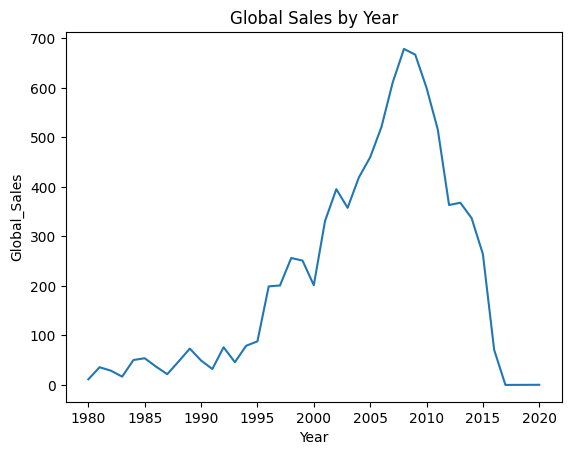

In [13]:
#문제 7 (선 그래프): 연도(Year)별 전 세계 총 판매량의 변화 추이를 선 그래프(Line Plot)로 그리세요.
 #(x축: 연도, y축: Global_Sales 합계)

year_df = df.groupby("Year")["Global_Sales"].sum()    #Series
plt.plot(year_df.index, year_df.values)

plt.xlabel("Year")
plt.ylabel("Global_Sales")
plt.title("Global Sales by Year")
plt.show()

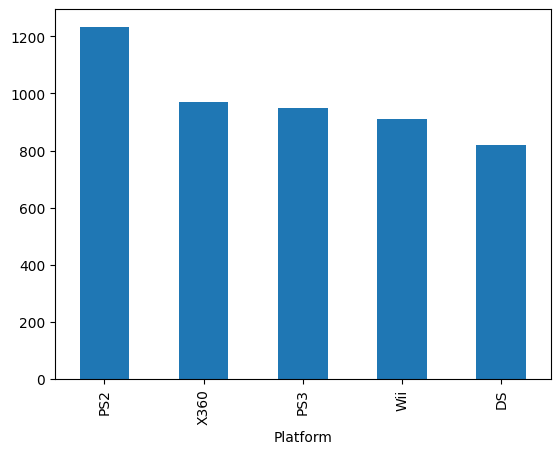

In [14]:
#문제 8 (막대 그래프): 판매량 상위 5개 플랫폼(Platform)을 추출하고,
#플랫폼별 전 세계 판매량을 막대 그래프(Bar Plot)로 시각화하세요.

platform_sales = df.groupby("Platform")["Global_Sales"].sum().sort_values(ascending = False).head(5)

platform_sales.plot(kind="bar")
plt.show()

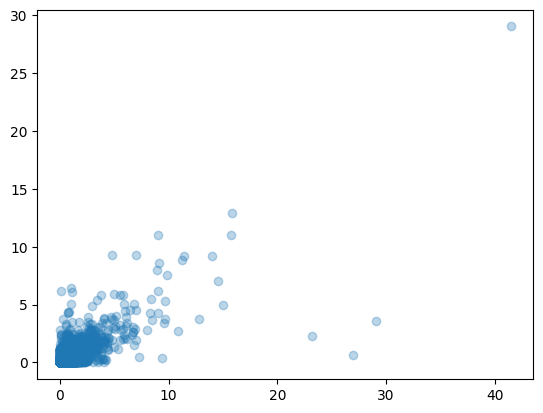

In [15]:
#문제 9 (산점도): 북미 판매량(NA_Sales)과 유럽 판매량(EU_Sales) 사이의 관계를 산점도(Scatter Plot)로 나타내고,
#두 지역 간에 양의 상관관계가 있는지 확인해 보세요.

plt.scatter(df["NA_Sales"], df["EU_Sales"], alpha=0.3)

Text(0.5, 1.0, 'after 2010 main publisher')

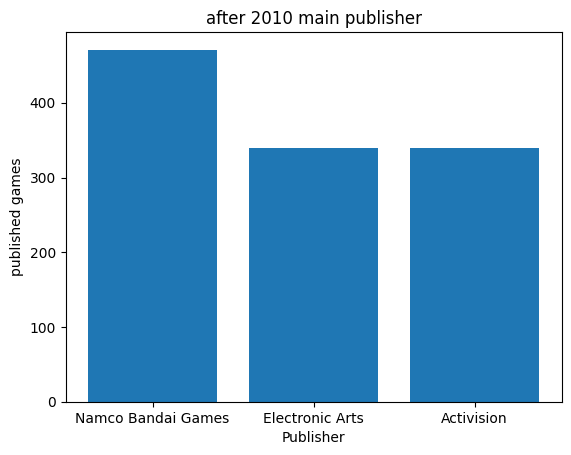

In [54]:
#문제 10: 2010년 이후에 출시된 게임들만 필터링한 후,
#해당 기간 동안 가장 많은 게임을 출시한 퍼블리셔(Publisher) 상위 3곳을 막대 그래프로 그리세요.

df_2010 = df[df["Year"]>=2010]
top3_publishers = df_2010.groupby("Publisher")["Name"].count().sort_values(ascending=False).head(3)
plt.bar(top3_publishers.index, top3_publishers.values)
plt.xlabel("Publisher")
plt.ylabel("published games")
plt.title("after 2010 main publisher")

<Figure size 640x480 with 0 Axes>

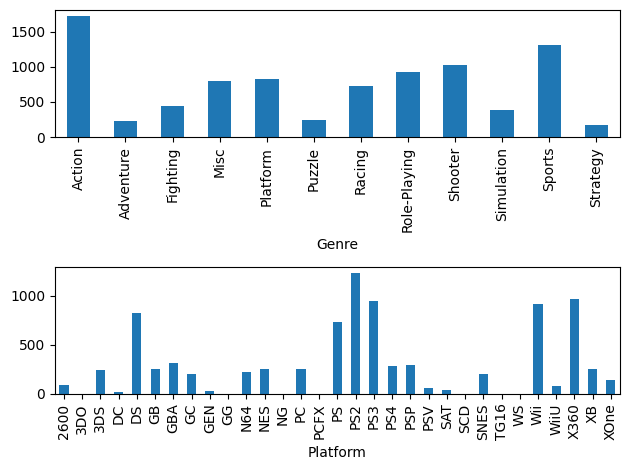

In [17]:
#문제 11: plt.subplots(2, 1)을 사용하여, 첫 번째 칸에는 '장르별 총 판매량'을,
#두 번째 칸에는 '플랫폼별 총 판매량'을 동시에 시각화하세요.

fig = plt.figure()
fig, (ax1, ax2) = plt.subplots(2, 1)

#장르별 판매량
df.groupby("Genre")["Global_Sales"].sum().plot(kind="bar", ax=ax1)

#플랫폼별 판매량
df.groupby("Platform")["Global_Sales"].sum().plot(kind="bar", ax=ax2)

plt.tight_layout()
plt.show()

#2. 심화
- 사용자 정의 함수 적용 및 파생변수

In [18]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [19]:
#문제 1 (비율 계산 및 파생 변수 생성)
#북미 시장의 매출 비중을 확인하고자 합니다. 각 게임의 북미 판매량(NA_Sales)이
#     전 세계 판매량(Global_Sales)에서 차지하는 백분율(%)을 계산하여 NA_Sales_Ratio라는 새로운 열을 추가하십시오.
#(참고: 0으로 나누는 에러가 발생하지 않도록 데이터 상태를 유의하여 연산하십시오.)

In [20]:
df["NA_Sales_Ratio"] = df["NA_Sales"]/df["Global_Sales"]*100
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,NA_Sales_Ratio
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,50.145033
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,72.266402
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,44.249023
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,47.727273
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,35.926044


In [21]:
#문제 2 (사용자 정의 함수와 apply 메서드 활용)
#출시 연도(Year)를 기준으로 시대별 범주화 작업을 진행하고자 합니다.
#다음 조건에 따라 문자열을 반환하는 파이썬 함수를 직접 정의하십시오.
"""
2000년 미만: 'Classic'

2000년 이상 ~ 2010년 미만: 'Retro'

2010년 이상: 'Modern'
"""
#정의한 함수를 Pandas의 .apply() 메서드를 이용해 Year 열에 적용하고, 그 결과를 Era라는 이름의 새로운 열에 저장하십시오.

"\n2000년 미만: 'Classic'\n\n2000년 이상 ~ 2010년 미만: 'Retro'\n\n2010년 이상: 'Modern'\n"

In [22]:
def year_categorise(year):
  if year < 2000:
    return "Classic"
  if year < 2010:
    return "Retro"
  else:
    return "Modern"

In [23]:
df["Era"] = df["Year"].apply(year_categorise)
df.Era.unique()

array(['Retro', 'Classic', 'Modern'], dtype=object)

In [24]:
#문제 3 (축(Axis) 기준 연산 및 다중 열 처리)
#각 게임이 어느 지역에서 가장 큰 인기를 끌었는지 파악하고자 합니다.
#NA_Sales, EU_Sales, JP_Sales, Other_Sales 4개의 열을 비교하여,
#각 행마다 가장 판매량이 높은 지역의 열 이름(또는 지역명)을 추출해 Top_Region이라는 새로운 열에 문자열로 저장하십시오.

In [25]:
df["Top_Region"]= df[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]].idxmax(axis=1).str[:2]
#idxmax() → 데이터프레임 최댓값의 컬럼명을 반환
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,NA_Sales_Ratio,Era,Top_Region
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,50.145033,Retro,NA
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,72.266402,Classic,NA
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,44.249023,Retro,NA
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,47.727273,Retro,NA
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,35.926044,Classic,NA


In [26]:
#문제 4 (조건부 필터링 및 복합 그룹화)
#소수의 히트작에 의한 통계 왜곡을 방지하기 위해,
#전체 데이터셋에서 게임을 50개 이상 출시한 퍼블리셔(Publisher)만 먼저 필터링하십시오.
#그다음 추려낸 대형 퍼블리셔들을 대상으로 게임 1개당 '평균' 전 세계 판매량(Global_Sales)을 계산하고,
#이 평균 수치가 가장 높은 상위 3개 퍼블리셔를 출력하십시오.

In [27]:
main_publisher = df.groupby("Publisher").filter(lambda x:len(x)>=50)
main_publisher.groupby("Publisher")["Global_Sales"].mean().sort_values(ascending=False).head(3)

,Global_Sales
Publisher,
Nintendo,2.563836
Microsoft Game Studios,1.300476
Bethesda Softworks,1.181594


##len(x)
###1. x의 정체 (분할된 미니 데이터프레임)

- df.groupby("Publisher")는 거대한 원본 데이터를 퍼블리셔별로 잘게 쪼갭니다.
- 이때 .filter(lambda x: ...)가 실행되면, 판다스는 쪼개진 덩어리들을 하나씩 람다 함수에 x라는 이름으로 전달합니다.
- 즉, 첫 번째 x는 'Nintendo'의 모든 원본 행만 모인 작은 데이터프레임입니다.
- 두 번째 x는 'Electronic Arts'의 원본 행만 모인 작은 데이터프레임입니다.

###2. len(x)의 작동 방식

- 파이썬에서 데이터프레임에 len() 함수를 씌우면 **해당 데이터프레임의 '총 행(Row)의 수'**를 반환합니다.
- 전달받은 x가 'Nintendo' 데이터프레임일 때, len(x)는 닌텐도가 출시한 총 게임의 개수(행의 수)를 계산합니다.
- 이 값이 50 이상인지(>= 50) 확인하여 조건에 맞으면 해당 그룹의 원본 행들을 살려두고, 아니면 버립니다.

# 3. 조건 연습



In [28]:
#문제 1 (다중 조건을 적용한 그룹 필터링)
#filter() 내부의 람다(lambda) 함수에 여러 조건을 결합하는 연습입니다.
#목표: 출시한 게임 수가 30개 이상이고, 동시에 해당 퍼블리셔 게임들의
#전 세계 평균 판매량(Global_Sales)이 1.0 이상인 퍼블리셔(Publisher)의 데이터만 추출하십시오.

In [29]:
grouped_publisher = df.groupby("Publisher")
df_publisher = grouped_publisher.filter(lambda x: (len(x)>=30) & (x["Global_Sales"].mean()>=1.0))
#lambda 함수 안에서 2개로 묶어야 함
df_publisher.set_index("Publisher")

,Rank,Name,Platform,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,NA_Sales_Ratio,Era,Top_Region
Publisher,,,,,,,,,,,,,
Nintendo,1,Wii Sports,Wii,2006,Sports,41.49,29.02,3.77,8.46,82.74,50.145033,Retro,NA
Nintendo,2,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,40.24,72.266402,Classic,NA
Nintendo,3,Mario Kart Wii,Wii,2008,Racing,15.85,12.88,3.79,3.31,35.82,44.249023,Retro,NA
Nintendo,4,Wii Sports Resort,Wii,2009,Sports,15.75,11.01,3.28,2.96,33.00,47.727273,Retro,NA
Nintendo,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,31.37,35.926044,Classic,NA
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Microsoft Game Studios,16328,RalliSport Challenge(JP sales),XB,2002,Racing,0.00,0.00,0.01,0.00,0.01,0.000000,Retro,JP
Bethesda Softworks,16366,Fallout Anthology,PC,2015,Action,0.00,0.01,0.00,0.00,0.01,0.000000,Modern,EU
Nintendo,16360,Mario vs. Donkey Kong: Tipping Stars,WiiU,2015,Puzzle,0.00,0.00,0.01,0.00,0.01,0.000000,Modern,JP


In [30]:
#문제 2 (any()를 활용한 특정 사건 발생 그룹 전체 추출)
#그룹 내에 특정 조건을 만족하는 행이 단 하나라도 존재하면 해당 그룹 전체의 데이터를 살리는 방식입니다.
#목표: 단일 게임으로 북미 판매량(NA_Sales)이 15.0 이상을 기록한 적이 있는 **플랫폼(Platform)**을 찾고,
#그 조건을 만족한 플랫폼에서 출시된 모든 게임의 데이터를 추출하십시오.

In [31]:
df.groupby("Platform").filter(lambda x: x["NA_Sales"].max()>=15.0).sort_values("Platform").set_index(["Platform", "Global_Sales"])

Rank  \
Platform Global_Sales          
GB       1.61           1144   
         2.19            745   
         2.19            746   
         0.56           3601   
         2.20            738   
...                      ...   
Wii      0.36           5163   
         0.37           5119   
         0.37           5101   
         0.35           5309   
         0.01          16577   

                                                                    Name  \
Platform Global_Sales                                                      
GB       1.61                                                   Baseball   
         2.19                                       Kirby's Pinball Land   
         2.19                                        Donkey Kong Country   
         0.56                                   Hamtaro: Ham-Hams Unite!   
         2.20                                               Wario Land 3   
...                                                                  ...   
Wii      0.36                   The Chronicles of Narnia: Prince Caspian   
         0.37                       Tiger Woods PGA Tour 12: The Masters   
         0.37                                                   The BIGS   
         0.35              Harry Potter and the Deathly Hallows - Part 2   
         0.01          Yattaman Wii: BikkuriDokkiri Machine de Mou Ra...   

                       Year         Genre                   Publisher  \
Platform Global_Sales                                                   
GB       1.61          1989        Sports                    Nintendo   
         2.19          1992          Misc                    Nintendo   
         2.19          2000      Platform                    Nintendo   
         0.56          2001  Role-Playing                    Nintendo   
         2.20          2000      Platform                    Nintendo   
...                     ...           ...                         ...   
Wii      0.36          2008        Action  Disney Interactive Studios   
         0.37          2011        Sports             Electronic Arts   
         0.37          2007        Sports        Take-Two Interactive   
         0.35          2011        Action             Electronic Arts   
         0.01          2008        Racing                 Takara Tomy   

                       NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
Platform Global_Sales                                              
GB       1.61              0.66      0.27      0.65         0.03   
         2.19              0.87      0.17      1.10         0.05   
         2.19              1.04      0.72      0.30         0.13   
         0.56              0.00      0.00      0.56         0.00   
         2.20              1.11      0.51      0.34         0.23   
...                         ...       ...       ...          ...   
Wii      0.36              0.31      0.02      0.00         0.03   
         0.37              0.21      0.13      0.00         0.03   
         0.37              0.34      0.00      0.00         0.03   
         0.35              0.18      0.14      0.00         0.03   
         0.01              0.00      0.00      0.01         0.00   

                       NA_Sales_Ratio      Era Top_Region  
Platform Global_Sales                                      
GB       1.61               40.993789  Classic         NA  
         2.19               39.726027  Classic         JP  
         2.19               47.488584    Retro         NA  
         0.56                0.000000    Retro         JP  
         2.20               50.454545    Retro         NA  
...                               ...      ...        ...  
Wii      0.36               86.111111    Retro         NA  
         0.37               56.756757   Modern         NA  
         0.37               91.891892    Retro         NA  
         0.35               51.428571   Modern         NA  
         0.01                0.000000    Retro         JP  

[1

In [32]:
#문제 3 (transform을 활용한 그룹 상대 평가 필터링)
#.filter()로 그룹을 통째로 날리는 대신, .transform()을 사용하여 행(Row) 단위로 비율 조건을 비교하는 고급 기법입니다.
#목표: 각 게임이 자신이 속한 장르(Genre)의 전 세계 총 판매량 중 10% 이상을 혼자 차지하는 '장르 내 메가 히트작'만 필터링하십시오.

In [33]:
genre_total = df.groupby("Genre")["Global_Sales"].transform("sum")
  # 장르별로 "Global_Sales"의 합을 구하되, transform("sum")이므로 행 수 변화 없이 구함(인덱스별로 값이 붙음)
game_ratio = df["Global_Sales"]/genre_total
mega_hit = df[game_ratio >= 0.1]
mega_hit

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,NA_Sales_Ratio,Era,Top_Region
5,6,Tetris,GB,1989,Puzzle,Nintendo,23.2,2.26,4.22,0.58,30.26,76.66887,Classic,NA


In [34]:
#문제 4 (문자열 조건 필터링과 그룹화의 결합)
#특정 단어가 포함된 데이터를 먼저 필터링한 후 그룹 연산을 수행하는 복합 문제입니다.
#목표: 게임 이름(Name)에 'Mario' 또는 **'Pokemon'**이 포함된 게임들만 필터링한 뒤,
#이 게임들의 연도(Year)별 전 세계 총 판매량을 구하여 선 그래프로 시각화하십시오.

Text(0.5, 1.0, 'Mario & Pokemon Sales by Year')

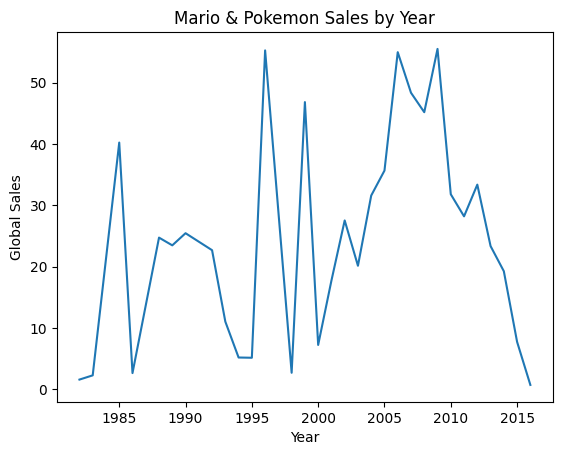

In [35]:
df_mario_pokemon = df[df["Name"].str.contains("Mario|Pokemon")]
df_mario_pokemon.groupby("Year")["Global_Sales"].sum().plot()
plt.xlabel("Year")
plt.ylabel("Global Sales")
plt.title("Mario & Pokemon Sales by Year")

#4. 지표 관련(어려움)

In [36]:
#문제 1: 다중 집계(Aggregation)를 활용한 플랫폼 수명 및 효율 분석
#플랫폼 비즈니스의 수명 주기와 연평균 효율을 평가하는 분석입니다.

#목표: Platform별로 게임이 출시된 최초 연도(min), 최근 연도(max), 그리고 누적 총판매량(sum)을 한 번의 코드 실행으로 구하십시오.

#추가 작업: '(최근 연도 - 최초 연도) + 1'을 해당 플랫폼의 수명(Lifespan)으로 정의하는 파생 변수를 만드십시오.
#누적 총판매량을 수명으로 나눈 '연평균 판매량'이 가장 높은 상위 5개 플랫폼을 도출하십시오.

In [37]:
df_platform = df.groupby("Platform").agg({"Year" : ["min", "max"],"Global_Sales" : "sum"})
df_platform["Lifespan"] = df_platform['Year']['max']-df_platform['Year']['min']+1
(df_platform["Global_Sales"]["sum"]/df_platform["Lifespan"]).sort_values(ascending=False).head()

,0
Platform,
PS2,102.788333
Wii,90.981000
PS3,86.304545
X360,80.800833
PS,72.739000


In [38]:
# '새로운_열_이름=("기존_열", "적용할_함수")' 형태로 지정
df_platform = df.groupby("Platform").agg(
    Year_min=("Year", "min"),
    Year_max=("Year", "max"),
    Sales_sum=("Global_Sales", "sum")
)

# 다중 인덱스 없이 1차원 컬럼명으로 바로 접근 가능
df_platform["Lifespan"] = df_platform["Year_max"] - df_platform["Year_min"] + 1
result = (df_platform["Sales_sum"] / df_platform["Lifespan"]).sort_values(ascending=False).head()

In [39]:
#문제 2: 누적 합계(cumsum)를 이용한 롱테일/파레토 법칙 검증

#목표: 전체 데이터를 Global_Sales 기준으로 내림차순 정렬한 뒤,
#판매량의 **누적 합계(Cumulative Sum)**를 구하는 새로운 열을 만드십시오.

#추가 작업: 이 누적 합계가 '전체 시장 총판매량의 80%' 지점에 도달할 때까지 소요된 게임의 개수를 구하고,
#이것이 전체 출시 게임 수(약 16,500개)의 **상위 몇 %**에 해당하는지 계산하십시오.

In [40]:
df = df.sort_values("Global_Sales", ascending=False)
df["Cumulative_Sum"] = df["Global_Sales"].cumsum()
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,NA_Sales_Ratio,Era,Top_Region,Cumulative_Sum
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,50.145033,Retro,NA,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,72.266402,Classic,NA,122.98
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,44.249023,Retro,NA,158.80
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,47.727273,Retro,NA,191.80
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,35.926044,Classic,NA,223.17


In [41]:
threshold = df["Global_Sales"].sum()*0.8
top_games = df[df["Cumulative_Sum"]>=threshold]
num_top_games = len(top_games)
len(top_games) / len(df) * 100

74.85147302015068

In [42]:
#문제 3: 그룹 내 비율 연산 및 시장 집중도(Concentration Ratio) 계산
#특정 연도에 소수의 대형 퍼블리셔가 시장을 독점하고 있는지 파악하는 지표입니다.

#목표: 매년(Year) Global_Sales 총합 대비, 해당 연도의 판매량 상위 3개 퍼블리셔의 판매량 합계가 차지하는 비율(%)을 구하십시오.

In [43]:
year_sales = df.groupby("Year")["Global_Sales"].sum()
large_publisher = df.groupby("Year").apply(lambda x: x.nlargest(3, "Global_Sales")["Global_Sales"].sum())
                            #.nlargest(개수, 참조할 열)[값 꺼낼 열]
                            # 해당 연도 내에서 Global Sales 수치가 가장 높은 3개행 추출
large_publisher / year_sales * 100

/tmp/ipython-input-75490/3133550979.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  large_publisher = df.groupby("Year").apply(lambda x: x.nlargest(3, "Global_Sales")["Global_Sales"].sum())


,0
Year,
1980,72.231986
1981,24.685491
1982,38.253638
1983,45.384157
1984,72.438443
1985,84.723767
1986,33.234421
1987,45.814167
1988,64.210080


In [44]:
#문제 4: 피벗 테이블(pivot_table)을 활용한 데이터 구조 변경 및 시각화
#실무에서 보고서 작성을 위해 가장 많이 쓰이는 형태인 교차표(Cross-tabulation)를 만드는 작업입니다.

#목표: 2000년부터 2015년 사이의 데이터만 필터링한 후,
# 행(Index)은 Year,
# 열(Column)은 3개 지역(NA_Sales, EU_Sales, JP_Sales)의 매출 총합으로 구성된 요약 데이터프레임을
# pd.pivot_table()을 사용하여 생성하십시오.

#추가 작업: 각 연도별로 세 지역 매출의 합이 1(100%)이 되도록 데이터를 비율로 정규화한 뒤,
#이를 **누적 막대그래프(Stacked Bar Chart)**로 시각화하여 시대별로 어느 지역의 점유율이 팽창/수축했는지 확인하십시오.

In [45]:
new_df = df[(df["Year"]>=2000) & (df["Year"]<= 2015)]
pivot_df = pd.pivot_table(data = new_df,
               index="Year",
               values=["NA_Sales", "EU_Sales", "JP_Sales"],
               aggfunc= "sum")

pivot_df

,EU_Sales,JP_Sales,NA_Sales
Year,,,
2000,52.75,42.77,94.49
2001,94.89,39.86,173.98
2002,109.74,41.76,216.19
2003,103.81,34.20,193.59
2004,107.32,41.65,222.59
2005,121.94,54.28,242.61
2006,129.24,73.73,263.12
2007,160.50,60.29,312.05
2008,184.40,60.26,351.44


Text(0.5, 1.0, 'Yearly Sales Ratio of Regions')

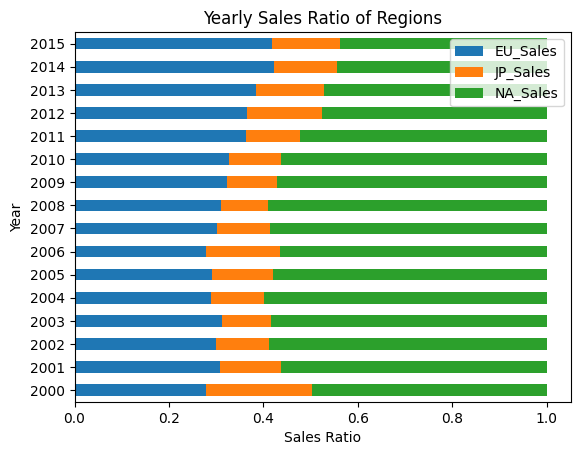

In [46]:
a = pivot_df.sum(axis=1)
normalised_pivot = pivot_df.div(a, axis=0)   #행에 맞추어서 계산(사칙연산일 때는 ~를 기준으로. 집계함수일때는 ~를 따라서.)
normalised_pivot.plot(kind="barh", stacked=True)
plt.xlabel("Sales Ratio")
plt.ylabel("Year")
plt.title("Yearly Sales Ratio of Regions")

In [47]:
#문제 1 (비율 계산 및 조건부 범주화: apply와 axis=1 활용)
#특정 시장에 편중된 데이터를 식별하고 범주화하는 작업입니다.
#목표: 전 세계 판매량(Global_Sales)이 1.0 (백만 장) 이상인 게임들만 필터링하십시오.
#그 후, 북미 판매량(NA_Sales)이 전 세계 판매량에서 차지하는 비율을 계산하여,
#이 비율이 **0.5 (50%)를 초과하면 'NA_Targeted', 그렇지 않으면 'Global_Targeted'**라는 값을 가지는 새로운 열(Target_Market)을 추가하십시오.

In [48]:
milions_df = df[df["Global_Sales"]>=1.0]
NA_Ratio = milions_df["NA_Sales"] / milions_df["Global_Sales"]
NA_Ratio

def target_market(ratio):
  if ratio > 0.5:
    return "NA_Targeted"
  else:
    return "Global_Targeted"

milions_df["NA_Ratio"] = NA_Ratio
milions_df["Target_market"] = milions_df["NA_Ratio"].apply(target_market)
milions_df.head()

/tmp/ipython-input-75490/728718813.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  milions_df["NA_Ratio"] = NA_Ratio
/tmp/ipython-input-75490/728718813.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  milions_df["Target_market"] = milions_df["NA_Ratio"].apply(target_market)


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,NA_Sales_Ratio,Era,Top_Region,Cumulative_Sum,NA_Ratio,Target_market
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,50.145033,Retro,NA,82.74,0.501450,NA_Targeted
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,72.266402,Classic,NA,122.98,0.722664,NA_Targeted
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,44.249023,Retro,NA,158.80,0.442490,Global_Targeted
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,47.727273,Retro,NA,191.80,0.477273,Global_Targeted
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,35.926044,Classic,NA,223.17,0.359260,Global_Targeted


In [49]:
#문제 2 (시계열 데이터의 전년 대비 증감량 계산: diff 활용)
#특정 집단의 연도별 실적 추이 변화를 분석하는 작업입니다.
#목표: 퍼블리셔가 **'Nintendo'**인 데이터만 필터링하여 연도(Year)별 전 세계 총 판매량을 계산하십시오.
#그 후, 각 연도의 총 판매량이 **전년도 대비 얼마나 증감했는지(차이값)**를 나타내는 새로운 열(YoY_Diff)을 만드십시오.

In [50]:
df_nintendo_year = df[df.Publisher == "Nintendo"].groupby("Year")
nintendo_sales = df_nintendo_year.agg(Nintendo_Sales=("Global_Sales", "sum"))
nintendo_sales["YoY_Diff"] = nintendo_sales.diff()
nintendo_sales

,Nintendo_Sales,YoY_Diff
Year,,
1983,10.96,NaN
1984,45.56,34.60
1985,49.95,4.39
1986,16.18,-33.77
1987,11.95,-4.23
1988,36.44,24.49
1989,63.88,27.44
1990,35.49,-28.39
1991,15.97,-19.52


In [51]:
#문제 3 (결측치 처리와 총계가 포함된 피벗 테이블: margins와 fill_value)
#보고서용 교차표(Cross-tabulation)를 작성할 때 필수적인 옵션들을 적용하는 작업입니다.

#목표: 'PS4', 'XOne', 'PC' 3가지 플랫폼만 포함하도록 데이터를 필터링하십시오.
#행(Index)은 장르(Genre), 열(Column)은 플랫폼(Platform), 값(Values)은 북미 판매량(NA_Sales)의 총합(sum)으로 구성된 피벗 테이블을 만드십시오.

#추가 조건:
#특정 플랫폼에 해당 장르의 게임이 출시되지 않아 발생한 빈칸(NaN)은 0으로 채우십시오.
#표의 맨 아래와 맨 오른쪽에 각 행과 열의 총합(Grand Total)을 표시하십시오.

In [53]:
platforms_filter = df[df['Platform'].isin(['PS4', 'XOne', 'PC'])].reset_index(drop=True)
platform_pivot = pd.pivot_table(data=platforms_filter, index="Genre", columns="Platform", values="NA_Sales", aggfunc="sum", fill_value=0, margins=True)
platform_pivot

Platform,PC,PS4,XOne,All
Genre,,,,
Action,9.74,29.70,19.45,58.89
Adventure,1.75,1.42,1.20,4.37
Fighting,0.02,3.40,1.58,5.00
Misc,5.60,2.83,4.44,12.87
Platform,0.05,2.18,0.44,2.67
Puzzle,0.09,0.00,0.00,0.09
Racing,0.39,2.47,3.94,6.80
Role-Playing,16.97,8.26,5.56,30.79
Shooter,17.78,28.02,31.78,77.58
